In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
import io
import seaborn as sns
import os
from os import listdir
from os.path import isfile, join
%matplotlib inline
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 12
#plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['patch.linewidth'] = 0.75

In [138]:
# path = "../datasets/Dataset1.csv"

In [137]:
# df = pd.read_csv(path, sep=' ', header=None)
# df.columns = ["D1", "D2"]
# df["type"] = "Instância"
# df

In [136]:
# pivots = [0,5,7,3,12,16]
# titles = ["ite=1","ite=2","ite=3","ite=4","ite=5","Saída"]

In [135]:
# fig = plt.figure(figsize=(8, 6))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# j = 0
# for i in range(1, 7):
#     df.at[pivots[j],"type"] = "Pivô"
#     ax = fig.add_subplot(2, 3, i)
#     g = sns.scatterplot(x="D1",
#                     y="D2",
#                     hue="type", data=df, ax=ax, palette=["red", "blue"])
#     ax.legend().set_visible(False)
#     g.set(title=titles[i-1])
#     g.set(xlabel=None)
#     g.set(ylabel=None)
#     g.set(xticks=np.arange(0,21,10))
#     g.set_xticklabels(np.arange(0,21,10))
#     g.set(yticks=np.arange(0,21,10))
#     g.set_yticklabels(np.arange(0,21,10))
#     j += 1
    
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=[0.5, -0.05], edgecolor="black")
# # plt.legend(loc="lower center", ncol=2, frameon=False)

In [32]:
def plot_pivots(path, pivotsIndex, aux = [], titles = ["", "", "", "", "", ""], sep = ' ', header = None, outputName = "fig.svg", figTitle = "", save=True, dpi=300, pivotMatrix = False):
    
    assert(len(pivotsIndex) == 6)
    assert(path != "")
    assert(path != " ")
    
    custom_palette = {
        'Instância': 'tab:blue',
        'Pivô': 'tab:red',
        'Auxiliar': 'tab:green'
    }

    pivots = []
    if not pivotMatrix:
        for i in range(len(pivotsIndex)):
            pivots.append([]) 
            for j in range(i+1):
                pivots[i].append(pivotsIndex[j])
    else:
        pivots = pivotsIndex

    df = pd.read_csv(path, sep=sep, header=header)
    df.columns = ["D1", "D2"]
    df["type"] = "Instância"
    
    for aux_pvt in aux:
        df.at[aux_pvt, "type"] = "Auxiliar"
        
    axis_title = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]
    
    fig = plt.figure(figsize=(4.536 , 3.24))
    fig, axs = plt.subplots(2, 3, sharey=True)
    #fig.subplots_adjust(hspace=0.1, wspace=0.4)
    for (i, ax) in zip(range(1,7), axs.flatten()):
        
        data = df.copy()
        
        for j in pivots[i-1]:
            data.at[j, "type"] = "Pivô"

        g = sns.scatterplot(x="D1",
                    y="D2",
                    hue="type", data=data, ax = ax, palette=custom_palette, linewidth = 0)
        ax.legend().set_visible(False)
        g.set(title=titles[i-1])
        g.set(xlabel=axis_title[i-1])
        g.set(ylabel=None)
        g.set(xticks=np.arange(0,21,10))
        
        if i < 4:
            g.set_xticklabels([])
        else:
            g.set_xticklabels(np.arange(0,21,10))
        
        
        g.set(yticks=np.arange(0,21,10))
        g.set_yticklabels(np.arange(0,21,10))
    
    handles, labels = axs[1,2].get_legend_handles_labels()
    sorted_labels, sorted_handles = zip(*sorted(zip(labels, handles),               
                                            key=lambda x: x[0].split()[-1]))
    
    fig.legend(sorted_handles, sorted_labels, loc='center right', ncol=1, bbox_to_anchor=[1.18, 0.5], edgecolor="black", handletextpad=0.01)
    fig.suptitle(figTitle)
    fig.tight_layout()

    
    if save:
        plt.savefig(outputName, dpi=dpi)


In [3]:
# titles = ["ite=1","ite=2","ite=3","ite=4","ite=5","Saída"]

In [169]:
# plot_pivots(path="../datasets/Dataset1.csv", pivots=[[2],[2,3],[2,3,19],[2,3,19,5],[2,3,19,5,6],[2,3,19,5,6,4]], aux=[0,7], titles=titles, sep=' ', header=None)

<Figure size 453.6x324 with 0 Axes>

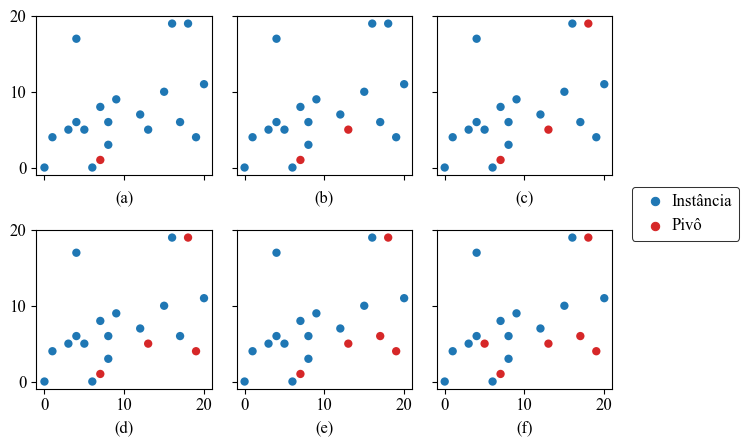

In [33]:
#RANDOM
#SEED = 3931
filePath = "../datasets/Dataset1.csv"
pvts = [8,0,13,1,4,17]
aux = []
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="random.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

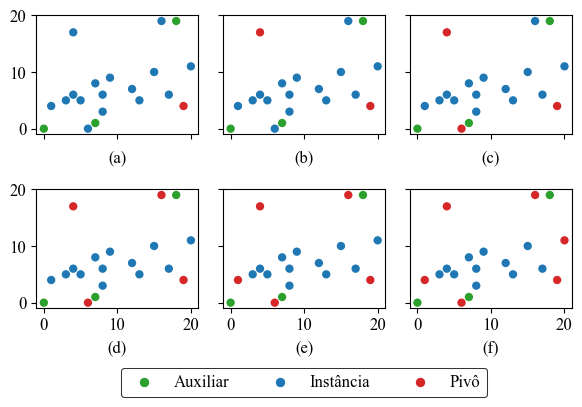

In [35]:
#CONVEX
#SEED = 32393
filePath = "../datasets/Dataset1.csv"
pvts = [1,7,2,6,14,9]
aux = [8,13,18]
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="convex.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

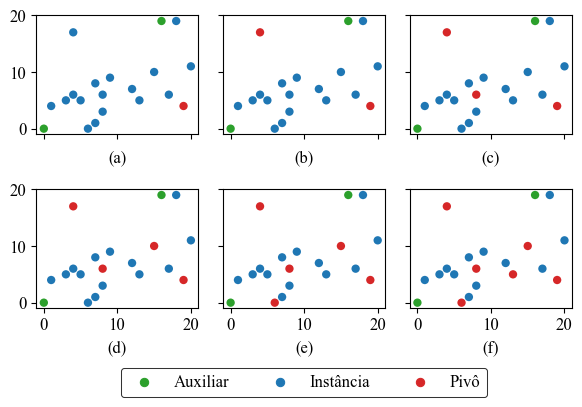

In [36]:
#GNAT
#SEED = 7733
filePath = "../datasets/Dataset1.csv"
pvts = [1,7,16,5,2,0]
aux = [6,18]
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="gnat.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

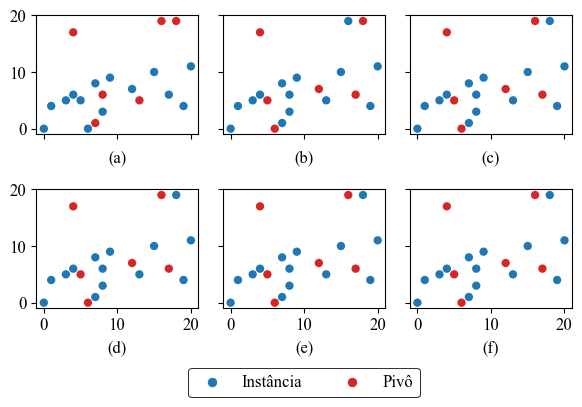

In [37]:
#KMEDOIDS
#SEED = 8745
filePath = "../datasets/Dataset1.csv"
pvts = [[7,13,0,16,6,8],
       [7,13,4,17,3,2],
       [7,6,4,17,3,2],
       [7,6,4,17,3,2],
       [7,6,4,17,3,2],
       [7,6,4,17,3,2]]
aux = []
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="kmedoids.svg", dpi=300, pivotMatrix=True)

<Figure size 504x360 with 0 Axes>

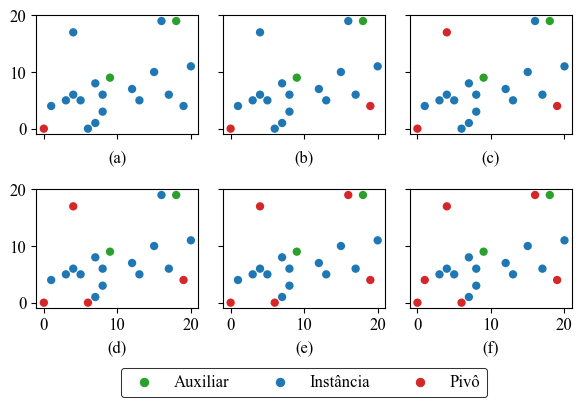

In [38]:
#MAXSEPARATED
#SEED = 60672
filePath = "../datasets/Dataset1.csv"
pvts = [18,1,7,2,6,14]
aux = [11,13]
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="maxseparated.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

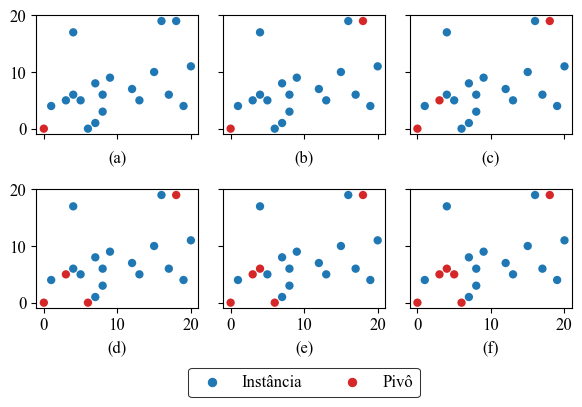

In [39]:
#MAXVARIANCE
#SEED = 88990
filePath = "../datasets/Dataset1.csv"
pvts = [18,13,12,2,19,17]
aux = []
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="maxvariance.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

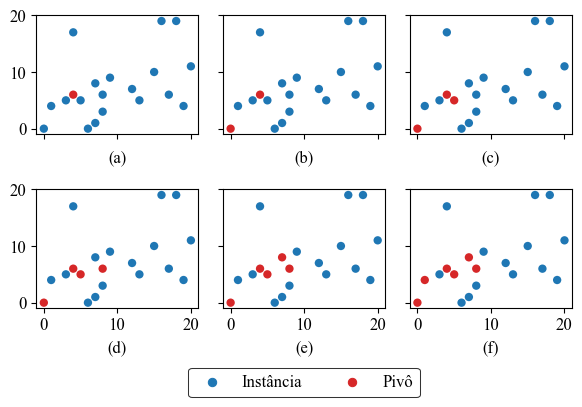

In [40]:
#PCA
#SEED = 31689
filePath = "../datasets/Dataset1.csv"
pvts = [19,18,17,16,15,14]
aux = []
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="pca.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

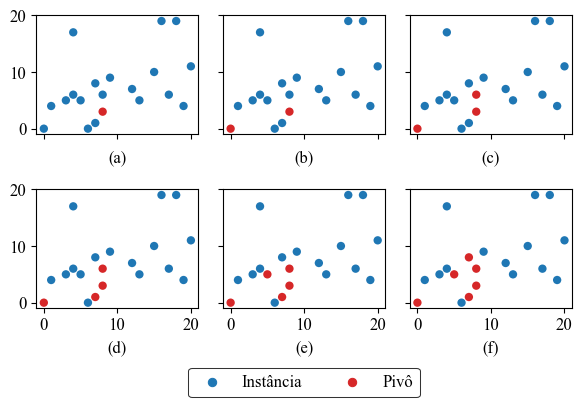

In [41]:
#SELECTION
#SEED = 98177
filePath = "../datasets/Dataset1.csv"
pvts = [10,18,16,8,17,15]
aux = []
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="selection.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

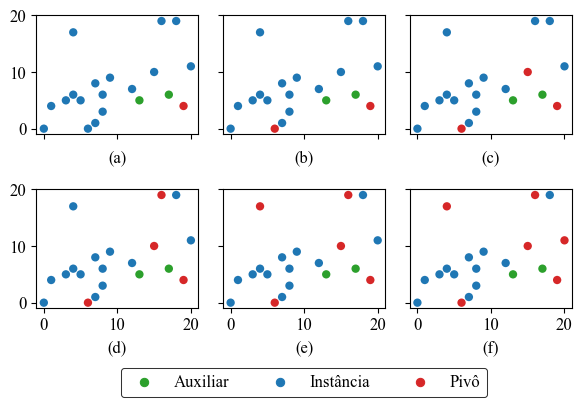

In [42]:
#SSS
#SEED = 42390
#alpha = 0.1
filePath = "../datasets/Dataset1.csv"
pvts = [1,2,5,6,7,9]
aux = [4,0]
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="sss.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

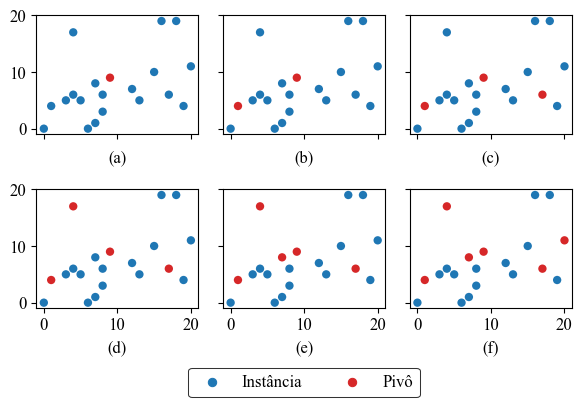

In [43]:
#IS
#SEED = 22962
filePath = "../datasets/Dataset1.csv"
pvts = [11,14,4,7,15,9]
aux = []
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="is.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

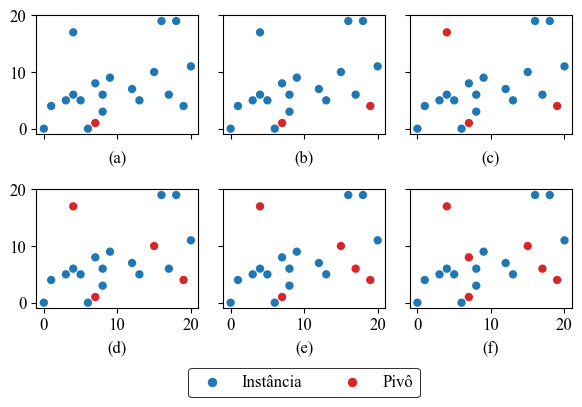

In [44]:
#HFI
#SEED = 55294
filePath = "../datasets/Dataset1.csv"
pvts = [8,1,7,5,4,15]
aux = []
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="hfi.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

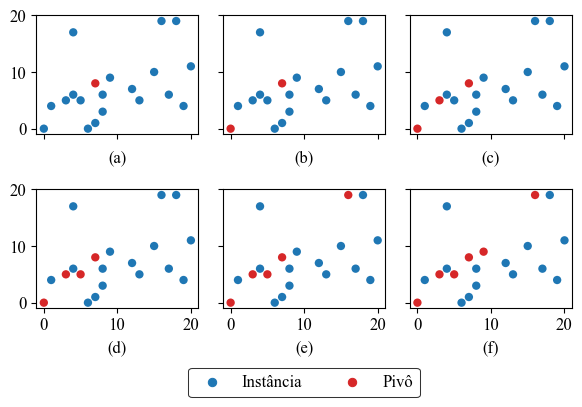

In [45]:
#WDR
#SEED = 94819
filePath = "../datasets/Dataset1.csv"
pvts = [15,18,12,17,6,11]
aux = []
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="wdr.svg", dpi=300)

<Figure size 504x360 with 0 Axes>

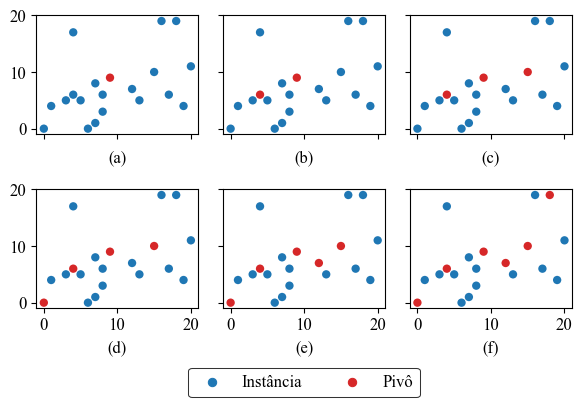

In [46]:
#BPP
#SEED = 4554
filePath = "../datasets/Dataset1.csv"
pvts = [11,19,5,18,3,13]
aux = []
titles = ["", "", "", "", "", ""]
plot_pivots(path=filePath, pivotsIndex=pvts, aux=aux, titles=titles, outputName="bpp.svg", dpi=300)